Set ENV user_type to properly run the model in the notebook

In [1]:
import os
os.environ["user_type"] = "terminal"

A short description about this model.

In [2]:
"""
A model for how fires spread through a forest.
"""

'\nA model for how fires spread through a forest.\n'

We import all necessary modules and functions from other files.

In [3]:
from lib.agent import DONT_MOVE
from lib.display_methods import TOMATO, GREEN, RED, SPRINGGREEN, BLACK
from lib.model import Model, MBR_ACTION, NUM_MBRS, COLOR
from lib.agent import prob_state_trans
from lib.space import exists_neighbor
from registry.registry import get_model

Creating new registry


These are the constants and global variables we used in this model.

In [4]:
MODEL_NAME = "forest_fire"
DEBUG = False  # turns debugging code on or off
DEBUG2 = False  # turns deeper debugging code on or off

DEF_NUM_TREES = 10
DEF_DIM = 30
DEF_DENSITY = .44
DEF_NEW_FIRE = .01
# tree group names
HEALTHY = "Healthy"
NEW_FIRE = "New Fire"
ON_FIRE = "On Fire"
BURNED_OUT = "Burned Out"
NEW_GROWTH = "New Growth"

# state numbers: create as strings for JSON,
# convert to int when we need 'em that way
HE = "0"
NF = "1"
OF = "2"
BO = "3"
NG = "4"

TRANS_TABLE = "trans_table"
state_trans = [
    [1 - DEF_NEW_FIRE, DEF_NEW_FIRE, 0.0, 0.0, 0.0],
    [0.0, 0.0, 1.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 1.0, 0.0],
    [0.0, 0.0, 0.0, .99, .01],
    [1.0, 0.0, 0.0, 0.0, 0.0],
]

GROUP_MAP = "group_map"

STATE_MAP = {HEALTHY: HE,
             NEW_FIRE: NF,
             ON_FIRE: OF,
             BURNED_OUT: BO,
             NEW_GROWTH: NG}

GROUP_MAP = {HE: HEALTHY,
             NF: NEW_FIRE,
             OF: ON_FIRE,
             BO: BURNED_OUT,
             NG: NEW_GROWTH}

The following functions define some actions that our agents can make.

In [5]:
def tree_action(agent, **kwargs):
    """
    A simple default agent action.
    """
    if DEBUG:
        print("Agent", str(agent), "is acting.")
    model = get_model(agent.exec_key)
    old_group = agent.group_name()
    if old_group == HEALTHY:
        if exists_neighbor(agent, lambda agent: agent.group_name() == ON_FIRE):
            if DEBUG2:
                print("Setting nearby tree on fire!")
            agent.set_prim_group(NEW_FIRE)

    # if we didn't catch on fire above, do probabilistic transition:
    if old_group == agent.group_name():
        curr_state = STATE_MAP[old_group]
        # we gotta do these str/int shenanigans with state cause
        # JSON only allows strings as dict keys
        agent.set_prim_group(GROUP_MAP[str(prob_state_trans(int(curr_state),
                                                            state_trans))])
        if DEBUG2:
            if agent.group_name == NEW_FIRE:
                print("Tree spontaneously catching fire.")

    if old_group != agent.group_name():
        model.add_switch(str(agent),
                         old_group,
                         agent.group_name())
    return DONT_MOVE

This structure defines the groups that characterize our agents.

In [6]:
ff_grps = {
    HEALTHY: {
        MBR_ACTION: tree_action,
        NUM_MBRS: DEF_NUM_TREES,
        COLOR: GREEN,
    },
    NEW_FIRE: {
        NUM_MBRS: 0,
        COLOR: TOMATO,
    },
    ON_FIRE: {
        NUM_MBRS: 0,
        COLOR: RED,
    },
    BURNED_OUT: {
        NUM_MBRS: 0,
        COLOR: BLACK,
    },
    NEW_GROWTH: {
        NUM_MBRS: 0,
        COLOR: SPRINGGREEN,
    },
}

We subclass `Model` to create our own variant of it.

In [7]:
class ForestFire(Model):
    """
    The forest fire model.
    """
    def handle_props(self, props):
        super().handle_props(props)
        height = self.props.get("grid_height")
        width = self.props.get("grid_width")
        density = self.props.get("density")
        num_agents = int(height * width * density)
        self.grp_struct[HEALTHY]["num_mbrs"] = num_agents

Here's where we create the model class.

In [8]:
def create_model(serial_obj=None, props=None):
    """
    This is for the sake of the API server:
    """
    if serial_obj is not None:
        return ForestFire(serial_obj=serial_obj)
    else:
        return ForestFire(MODEL_NAME, grp_struct=ff_grps,
                          props=props)

The main function runs the whole model.

In [9]:
def main():
    model = create_model()
    model.run()
    return 0

Now just call main!

What is the grid height? [2-100] (40) 
What is the grid width? [2-100] (40) 
What is the probability a tree will catch fire on its own? [0.0001-0.5] (0.01) 
How dense are the trees in the forest? [0.1-0.8] (0.44) 
Creating new registry with key: 768602055
Welcome to Indra, terminal!
Running model forest_fire

***************
Menu of Actions
***************
1.  Run for N periods
2.  Display a population graph
3.  Display a scatter plot
4.  Display a bar graph
5.  Examine model data
7.  View log
0.  Quit
Please choose a number from the menu above:
3


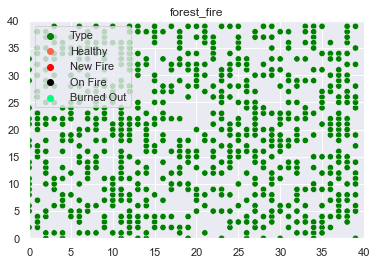


***************
Menu of Actions
***************
1.  Run for N periods
2.  Display a population graph
3.  Display a scatter plot
4.  Display a bar graph
5.  Examine model data
7.  View log
0.  Quit


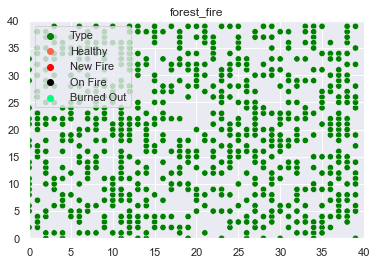

Please choose a number from the menu above:

How many periods? 
In user, calling model to run 1 steps.

Census for period 0
Group census:
  Healthy (members: 704)
  New Fire (members: 0)
  On Fire (members: 0)
  Burned Out (members: 0)
  New Growth (members: 0)
 Agent census:
  Agents who moved: 0
  Agents who switched groups: 0

***************
Menu of Actions
***************
1.  Run for N periods
2.  Display a population graph
3.  Display a scatter plot
4.  Display a bar graph
5.  Examine model data
7.  View log
0.  Quit


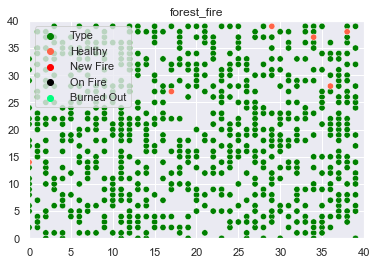

Please choose a number from the menu above:

How many periods? 
In user, calling model to run 1 steps.

Census for period 1
Group census:
  Healthy (members: 698)
  New Fire (members: 6)
  On Fire (members: 0)
  Burned Out (members: 0)
  New Growth (members: 0)
 Agent census:
  Agents who moved: 0
  Agents who switched groups: 6

***************
Menu of Actions
***************
1.  Run for N periods
2.  Display a population graph
3.  Display a scatter plot
4.  Display a bar graph
5.  Examine model data
7.  View log
0.  Quit


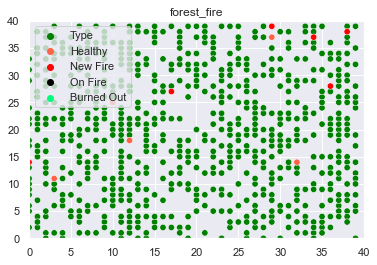

Please choose a number from the menu above:


In [ ]:
if __name__ == "__main__":
    main()